In [1]:
!pip install panda
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats



In [2]:
# Load datasets
#Dataset1 (Data Acquisition and Data Wrangling)
df1 = pd.read_csv('DatasetOne.csv')
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18
606,607,28-01-2011,1,0,1,12,False,5,3,0.18
607,608,28-01-2011,1,0,1,13,False,5,3,0.18
608,609,28-01-2011,1,0,1,14,False,5,3,0.22


In [3]:
df1 = df1.rename(columns = {'dteday':'dateday','yr':'year','mnth':'month','hr':'hour','temp':'temperatureInCelsius'})
print(df1)

     instant     dateday  season  year  month  hour  holiday  weekday  \
0          1  01-01-2011       1     0      1     0    False        6   
1          2  01-01-2011       1     0      1     1    False        6   
2          3  01-01-2011       1     0      1     2    False        6   
3          4  01-01-2011       1     0      1     3    False        6   
4          5  01-01-2011       1     0      1     4    False        6   
..       ...         ...     ...   ...    ...   ...      ...      ...   
605      606  28-01-2011       1     0      1    11    False        5   
606      607  28-01-2011       1     0      1    12    False        5   
607      608  28-01-2011       1     0      1    13    False        5   
608      609  28-01-2011       1     0      1    14    False        5   
609      610  28-01-2011       1     0      1    15    False        5   

     weathersit  temperatureInCelsius  
0             1                  0.24  
1             1                  0.22  
2  

In [4]:
df1.head()

,instant,dateday,season,year,month,hour,holiday,weekday,weathersit,temperatureInCelsius
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24


In [5]:
# Identify unique values in a specific column (e.g., 'season')
unique_values = df1['season'].unique()
print(unique_values)


[1]


In [6]:
drop_column=df1.drop(columns=['holiday'])
drop_column

,instant,dateday,season,year,month,hour,weekday,weathersit,temperatureInCelsius
0,1,01-01-2011,1,0,1,0,6,1,0.24
1,2,01-01-2011,1,0,1,1,6,1,0.22
2,3,01-01-2011,1,0,1,2,6,1,0.22
3,4,01-01-2011,1,0,1,3,6,1,0.24
4,5,01-01-2011,1,0,1,4,6,1,0.24
...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,5,3,0.18
606,607,28-01-2011,1,0,1,12,5,3,0.18
607,608,28-01-2011,1,0,1,13,5,3,0.18
608,609,28-01-2011,1,0,1,14,5,3,0.22


In [7]:
# Check the dimensions (rows and columns) of the dataset
dimensions = df1.shape
print(f'Dimensions: {dimensions}')


Dimensions: (610, 10)


In [8]:
# Check the datatype of each column
datatypes = df1.dtypes
print(datatypes)


instant                   int64
dateday                  object
season                    int64
year                      int64
month                     int64
hour                      int64
holiday                    bool
weekday                   int64
weathersit                int64
temperatureInCelsius    float64
dtype: object


In [9]:
# Get a summary of the dataset, including data types and non-null counts
summary = df1.info()
print(summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   instant               610 non-null    int64  
 1   dateday               610 non-null    object 
 2   season                610 non-null    int64  
 3   year                  610 non-null    int64  
 4   month                 610 non-null    int64  
 5   hour                  610 non-null    int64  
 6   holiday               610 non-null    bool   
 7   weekday               610 non-null    int64  
 8   weathersit            610 non-null    int64  
 9   temperatureInCelsius  610 non-null    float64
dtypes: bool(1), float64(1), int64(7), object(1)
memory usage: 43.6+ KB
None


In [10]:
# Check for missing values
missing_values = df1.isnull().sum()
print(missing_values)

# Drop rows with missing values
df1 = df1.dropna()

# Alternatively, fill missing values with a specific value (e.g., 0)
# df1 = df1.fillna(0)


instant                 0
dateday                 0
season                  0
year                    0
month                   0
hour                    0
holiday                 0
weekday                 0
weathersit              0
temperatureInCelsius    0
dtype: int64


In [11]:
# Example: Validate that 'instant' column has unique values
if df1['instant'].is_unique:
    print('All instances are unique.')
else:
    print('There are duplicate instances.')

# Example: Validate that 'temp' column has no negative values
if (df1['temperatureInCelsius'] >= 0).all():
    print('All temperatures are non-negative.')
else:
    print('There are negative temperatures.')


All instances are unique.
All temperatures are non-negative.


In [12]:
#Dataset2 (Data Acquisition and Data Wrangling)
df2 = pd.read_csv('dataset_2.csv')
df2

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0000,3,13,16
1,1,2,0.2727,0.80,0.0000,8,32,40
2,2,3,0.2727,0.80,0.0000,5,27,32
3,3,4,0.2879,0.75,0.0000,3,10,13
4,4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...
605,605,606,0.2121,0.93,0.1045,0,30,30
606,606,607,0.2121,0.93,0.1045,1,28,29
607,607,608,0.2121,0.93,0.1045,0,31,31
608,608,609,0.2727,0.80,0.0000,2,36,38


In [13]:
df2.head()

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0,3,13,16
1,1,2,0.2727,0.80,0.0,8,32,40
2,2,3,0.2727,0.80,0.0,5,27,32
3,3,4,0.2879,0.75,0.0,3,10,13
4,4,5,0.2879,0.75,0.0,0,1,1


In [14]:
# Identify unique values in a specific column (e.g., 'season')
unique_values = df2['atemp'].unique()
print(unique_values)


[0.2879 0.2727 0.2576    nan 0.3485 0.3939 0.3333 0.4242 0.4545 0.4394
 0.4091 0.2273 0.2121 0.197  0.1364 0.1061 0.1212 0.1667 0.1818 0.2424
 0.1515 0.3182 0.0606 0.0758 0.0909 0.303  0.0303 0.0455 0.     0.0152]


In [15]:
# Drop columns that are not needed (e.g., 'holiday')
cleaned_df = df2.drop(columns=['Unnamed: 0'])
print(cleaned_df.head())

   instant   atemp   hum  windspeed  casual  registered  cnt
0        1  0.2879  0.81        0.0       3          13   16
1        2  0.2727  0.80        0.0       8          32   40
2        3  0.2727  0.80        0.0       5          27   32
3        4  0.2879  0.75        0.0       3          10   13
4        5  0.2879  0.75        0.0       0           1    1


In [16]:
# Check the dimensions (rows and columns) of the dataset
dimensions = cleaned_df.shape
print(f'Dimensions: {dimensions}')


Dimensions: (610, 7)


In [17]:
# Check the datatype of each column
datatypes = cleaned_df.dtypes
print(datatypes)


instant         int64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [18]:
# Get a summary of the dataset, including data types and non-null counts
summary = cleaned_df.info()
print(summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     610 non-null    int64  
 1   atemp       599 non-null    float64
 2   hum         610 non-null    float64
 3   windspeed   610 non-null    float64
 4   casual      610 non-null    int64  
 5   registered  610 non-null    int64  
 6   cnt         610 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 33.5 KB
None


In [19]:
# Check for missing values
missing_values = cleaned_df.isnull().sum()
print(missing_values)

# Drop rows with missing values
#df1 = df1.dropna()

# Alternatively, fill missing values with a specific value (e.g., 0)
cleaned_df = cleaned_df.fillna(0)


instant        0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64


In [20]:
# Example: Validate that 'instant' column has unique values
if cleaned_df['instant'].is_unique:
    print('All instances are unique.')
else:
    print('There are duplicate instances.')

# Example: Validate that 'temp' column has no negative values
if (cleaned_df['atemp'] >= 0).all():
    print('All temperatures are non-negative.')
else:
    print('There are negative temperatures.')

All instances are unique.
All temperatures are non-negative.


In [21]:
# merged of dataset2 and dataset2 
merged_df = pd.merge(df1, cleaned_df, on='instant')
print(merged_df.head())


   instant     dateday  season  year  month  hour  holiday  weekday  \
0        1  01-01-2011       1     0      1     0    False        6   
1        2  01-01-2011       1     0      1     1    False        6   
2        3  01-01-2011       1     0      1     2    False        6   
3        4  01-01-2011       1     0      1     3    False        6   
4        5  01-01-2011       1     0      1     4    False        6   

   weathersit  temperatureInCelsius   atemp   hum  windspeed  casual  \
0           1                  0.24  0.2879  0.81        0.0       3   
1           1                  0.22  0.2727  0.80        0.0       8   
2           1                  0.22  0.2727  0.80        0.0       5   
3           1                  0.24  0.2879  0.75        0.0       3   
4           1                  0.24  0.2879  0.75        0.0       0   

   registered  cnt  
0          13   16  
1          32   40  
2          27   32  
3          10   13  
4           1    1  


In [22]:
merged_df

,instant,dateday,season,year,month,hour,holiday,weekday,weathersit,temperatureInCelsius,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18,0.2121,0.93,0.1045,0,30,30
606,607,28-01-2011,1,0,1,12,False,5,3,0.18,0.2121,0.93,0.1045,1,28,29
607,608,28-01-2011,1,0,1,13,False,5,3,0.18,0.2121,0.93,0.1045,0,31,31
608,609,28-01-2011,1,0,1,14,False,5,3,0.22,0.2727,0.80,0.0000,2,36,38


In [23]:
# Merge columns
merged_df['tempe'] = merged_df['temperatureInCelsius'].astype(str) + ' ' + merged_df['atemp'].astype(str)
#print(merged_df.head())
merged_df

,instant,dateday,season,year,month,hour,holiday,weekday,weathersit,temperatureInCelsius,atemp,hum,windspeed,casual,registered,cnt,tempe
0,1,01-01-2011,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0000,3,13,16,0.24 0.2879
1,2,01-01-2011,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0000,8,32,40,0.22 0.2727
2,3,01-01-2011,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0000,5,27,32,0.22 0.2727
3,4,01-01-2011,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0000,3,10,13,0.24 0.2879
4,5,01-01-2011,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0000,0,1,1,0.24 0.2879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18,0.2121,0.93,0.1045,0,30,30,0.18 0.2121
606,607,28-01-2011,1,0,1,12,False,5,3,0.18,0.2121,0.93,0.1045,1,28,29,0.18 0.2121
607,608,28-01-2011,1,0,1,13,False,5,3,0.18,0.2121,0.93,0.1045,0,31,31,0.18 0.2121
608,609,28-01-2011,1,0,1,14,False,5,3,0.22,0.2727,0.80,0.0000,2,36,38,0.22 0.2727


In [24]:
# Drop original columns
merged_df = merged_df.drop(columns=['temperatureInCelsius', 'atemp'])
print(merged_df.head())


   instant     dateday  season  year  month  hour  holiday  weekday  \
0        1  01-01-2011       1     0      1     0    False        6   
1        2  01-01-2011       1     0      1     1    False        6   
2        3  01-01-2011       1     0      1     2    False        6   
3        4  01-01-2011       1     0      1     3    False        6   
4        5  01-01-2011       1     0      1     4    False        6   

   weathersit   hum  windspeed  casual  registered  cnt        tempe  
0           1  0.81        0.0       3          13   16  0.24 0.2879  
1           1  0.80        0.0       8          32   40  0.22 0.2727  
2           1  0.80        0.0       5          27   32  0.22 0.2727  
3           1  0.75        0.0       3          10   13  0.24 0.2879  
4           1  0.75        0.0       0           1    1  0.24 0.2879  


In [25]:
df3= pd.read_csv('DatasetOne.csv')
df3

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18
606,607,28-01-2011,1,0,1,12,False,5,3,0.18
607,608,28-01-2011,1,0,1,13,False,5,3,0.18
608,609,28-01-2011,1,0,1,14,False,5,3,0.22


In [26]:
# Concatenate the datasets
combined_df = pd.concat([merged_df , df3], ignore_index=True)
print(combined_df.head())


   instant     dateday  season  year  month  hour  holiday  weekday  \
0        1  01-01-2011       1   0.0    1.0   0.0    False        6   
1        2  01-01-2011       1   0.0    1.0   1.0    False        6   
2        3  01-01-2011       1   0.0    1.0   2.0    False        6   
3        4  01-01-2011       1   0.0    1.0   3.0    False        6   
4        5  01-01-2011       1   0.0    1.0   4.0    False        6   

   weathersit   hum  windspeed  casual  registered   cnt        tempe dteday  \
0           1  0.81        0.0     3.0        13.0  16.0  0.24 0.2879    NaN   
1           1  0.80        0.0     8.0        32.0  40.0  0.22 0.2727    NaN   
2           1  0.80        0.0     5.0        27.0  32.0  0.22 0.2727    NaN   
3           1  0.75        0.0     3.0        10.0  13.0  0.24 0.2879    NaN   
4           1  0.75        0.0     0.0         1.0   1.0  0.24 0.2879    NaN   

   yr  mnth  hr  temp  
0 NaN   NaN NaN   NaN  
1 NaN   NaN NaN   NaN  
2 NaN   NaN NaN   Na

In [27]:
combined_df

,instant,dateday,season,year,month,hour,holiday,weekday,weathersit,hum,windspeed,casual,registered,cnt,tempe,dteday,yr,mnth,hr,temp
0,1,01-01-2011,1,0.0,1.0,0.0,False,6,1,0.81,0.0,3.0,13.0,16.0,0.24 0.2879,NaN,NaN,NaN,NaN,NaN
1,2,01-01-2011,1,0.0,1.0,1.0,False,6,1,0.80,0.0,8.0,32.0,40.0,0.22 0.2727,NaN,NaN,NaN,NaN,NaN
2,3,01-01-2011,1,0.0,1.0,2.0,False,6,1,0.80,0.0,5.0,27.0,32.0,0.22 0.2727,NaN,NaN,NaN,NaN,NaN
3,4,01-01-2011,1,0.0,1.0,3.0,False,6,1,0.75,0.0,3.0,10.0,13.0,0.24 0.2879,NaN,NaN,NaN,NaN,NaN
4,5,01-01-2011,1,0.0,1.0,4.0,False,6,1,0.75,0.0,0.0,1.0,1.0,0.24 0.2879,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,606,NaN,1,NaN,NaN,NaN,False,5,3,NaN,NaN,NaN,NaN,NaN,NaN,28-01-2011,0.0,1.0,11.0,0.18
1216,607,NaN,1,NaN,NaN,NaN,False,5,3,NaN,NaN,NaN,NaN,NaN,NaN,28-01-2011,0.0,1.0,12.0,0.18
1217,608,NaN,1,NaN,NaN,NaN,False,5,3,NaN,NaN,NaN,NaN,NaN,NaN,28-01-2011,0.0,1.0,13.0,0.18
1218,609,NaN,1,NaN,NaN,NaN,False,5,3,NaN,NaN,NaN,NaN,NaN,NaN,28-01-2011,0.0,1.0,14.0,0.22


In [28]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values)

# Handle missing values (e.g., drop rows with missing values)
#combined_df = combined_df.dropna()

# Alternatively, fill missing values with a specific value (e.g., 0)
#combined_df = combined_df.fillna(0)


instant         0
dateday       610
season          0
year          610
month         610
hour          610
holiday         0
weekday         0
weathersit      0
hum           610
windspeed     610
casual        610
registered    610
cnt           610
tempe         610
dteday        610
yr            610
mnth          610
hr            610
temp          610
dtype: int64


In [29]:
# Drop the columns 'season', 'year', and 'yr'
combined_df = combined_df.drop(columns=['season', 'year', 'yr'])
print(combined_df.head())
combined_df

   instant     dateday  month  hour  holiday  weekday  weathersit   hum  \
0        1  01-01-2011    1.0   0.0    False        6           1  0.81   
1        2  01-01-2011    1.0   1.0    False        6           1  0.80   
2        3  01-01-2011    1.0   2.0    False        6           1  0.80   
3        4  01-01-2011    1.0   3.0    False        6           1  0.75   
4        5  01-01-2011    1.0   4.0    False        6           1  0.75   

   windspeed  casual  registered   cnt        tempe dteday  mnth  hr  temp  
0        0.0     3.0        13.0  16.0  0.24 0.2879    NaN   NaN NaN   NaN  
1        0.0     8.0        32.0  40.0  0.22 0.2727    NaN   NaN NaN   NaN  
2        0.0     5.0        27.0  32.0  0.22 0.2727    NaN   NaN NaN   NaN  
3        0.0     3.0        10.0  13.0  0.24 0.2879    NaN   NaN NaN   NaN  
4        0.0     0.0         1.0   1.0  0.24 0.2879    NaN   NaN NaN   NaN  


,instant,dateday,month,hour,holiday,weekday,weathersit,hum,windspeed,casual,registered,cnt,tempe,dteday,mnth,hr,temp
0,1,01-01-2011,1.0,0.0,False,6,1,0.81,0.0,3.0,13.0,16.0,0.24 0.2879,NaN,NaN,NaN,NaN
1,2,01-01-2011,1.0,1.0,False,6,1,0.80,0.0,8.0,32.0,40.0,0.22 0.2727,NaN,NaN,NaN,NaN
2,3,01-01-2011,1.0,2.0,False,6,1,0.80,0.0,5.0,27.0,32.0,0.22 0.2727,NaN,NaN,NaN,NaN
3,4,01-01-2011,1.0,3.0,False,6,1,0.75,0.0,3.0,10.0,13.0,0.24 0.2879,NaN,NaN,NaN,NaN
4,5,01-01-2011,1.0,4.0,False,6,1,0.75,0.0,0.0,1.0,1.0,0.24 0.2879,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,606,NaN,NaN,NaN,False,5,3,NaN,NaN,NaN,NaN,NaN,NaN,28-01-2011,1.0,11.0,0.18
1216,607,NaN,NaN,NaN,False,5,3,NaN,NaN,NaN,NaN,NaN,NaN,28-01-2011,1.0,12.0,0.18
1217,608,NaN,NaN,NaN,False,5,3,NaN,NaN,NaN,NaN,NaN,NaN,28-01-2011,1.0,13.0,0.18
1218,609,NaN,NaN,NaN,False,5,3,NaN,NaN,NaN,NaN,NaN,NaN,28-01-2011,1.0,14.0,0.22


In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     1220 non-null   int64  
 1   dateday     610 non-null    object 
 2   month       610 non-null    float64
 3   hour        610 non-null    float64
 4   holiday     1220 non-null   bool   
 5   weekday     1220 non-null   int64  
 6   weathersit  1220 non-null   int64  
 7   hum         610 non-null    float64
 8   windspeed   610 non-null    float64
 9   casual      610 non-null    float64
 10  registered  610 non-null    float64
 11  cnt         610 non-null    float64
 12  tempe       610 non-null    object 
 13  dteday      610 non-null    object 
 14  mnth        610 non-null    float64
 15  hr          610 non-null    float64
 16  temp        610 non-null    float64
dtypes: bool(1), float64(10), int64(3), object(3)
memory usage: 153.8+ KB


In [31]:
print(combined_df.shape)

(1220, 17)


In [37]:
# Select only numeric columns
numeric_df = combined_df.select_dtypes(include=['number'])


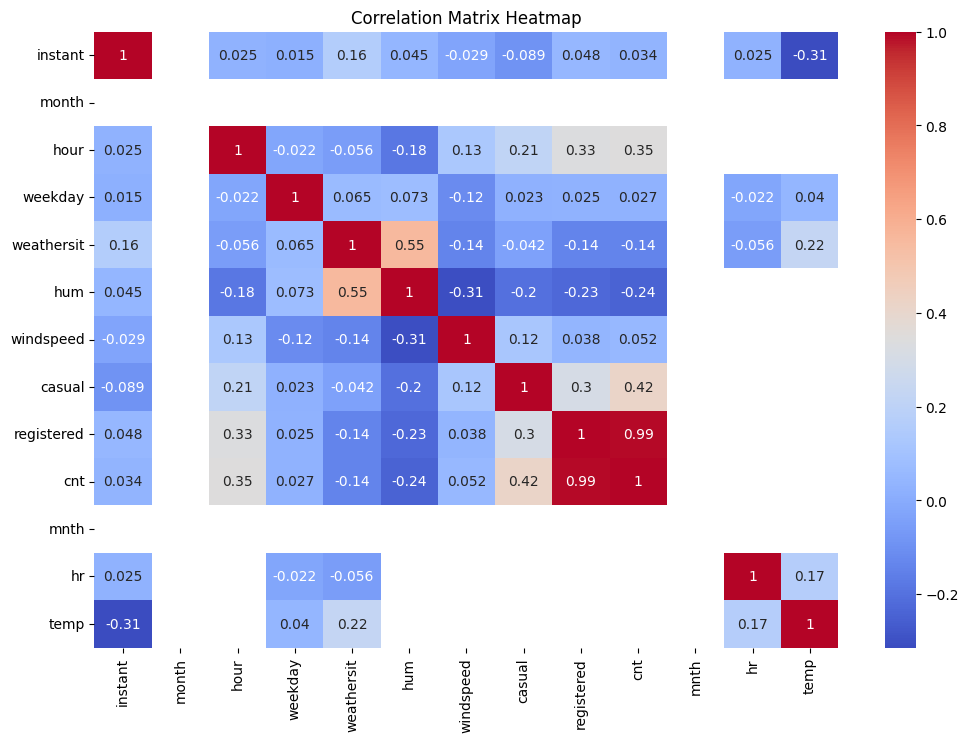

In [39]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [41]:
# Save the DataFrame to a CSV file
combined_df.to_csv('final_dataset.csv', index=False)


In [ ]:
# Save the DataFrame to an Excel file
combined_df.to_excel('final_dataset.xlsx', index=False)
